In [2]:
import pandas as pd
import numpy as np

In [3]:
train_df = pd.read_csv('./data./train_practice.csv')
test_df = pd.read_csv('./data./test_practice.csv')

In [4]:
train_df.index

RangeIndex(start=0, stop=5000, step=1)

In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  5000 non-null   int64  
 1   ID          5000 non-null   object 
 2   나이          5000 non-null   int64  
 3   키(cm)       5000 non-null   int64  
 4   몸무게(kg)     5000 non-null   int64  
 5   BMI         4499 non-null   float64
 6   시력          5000 non-null   float64
 7   충치          5000 non-null   int64  
 8   공복 혈당       5000 non-null   int64  
 9   혈압          5000 non-null   int64  
 10  중성 지방       5000 non-null   int64  
 11  혈청 크레아티닌    5000 non-null   float64
 12  콜레스테롤       5000 non-null   int64  
 13  고밀도지단백      5000 non-null   int64  
 14  저밀도지단백      4525 non-null   float64
 15  헤모글로빈       5000 non-null   float64
 16  요 단백        5000 non-null   int64  
 17  간 효소율       5000 non-null   float64
 18  label       5000 non-null   int64  
dtypes: float64(6), int64(12), o

In [6]:
train_df.head()

,Unnamed: 0,ID,나이,키(cm),몸무게(kg),BMI,시력,충치,공복 혈당,혈압,중성 지방,혈청 크레아티닌,콜레스테롤,고밀도지단백,저밀도지단백,헤모글로빈,요 단백,간 효소율,label
0,738,TRAIN_0738,30,175,90,29.39,1.2,0,85,46,75,0.9,200,37,NaN,16.3,1,0.81,1
1,2318,TRAIN_2318,60,150,50,NaN,0.6,0,86,46,74,0.8,235,55,165.0,13.9,1,2.27,0
2,2743,TRAIN_2743,40,150,45,20.00,1.2,0,71,40,64,0.7,233,65,155.0,14.0,1,1.59,0
3,3725,TRAIN_3725,30,170,70,24.22,1.2,1,98,50,111,1.2,208,66,119.0,15.4,1,0.75,0
4,4544,TRAIN_4544,70,165,70,NaN,0.9,1,103,53,171,1.0,217,55,128.0,15.6,1,0.69,0


In [7]:
train_df.isna().sum()

Unnamed: 0      0
ID              0
나이              0
키(cm)           0
몸무게(kg)         0
BMI           501
시력              0
충치              0
공복 혈당           0
혈압              0
중성 지방           0
혈청 크레아티닌        0
콜레스테롤           0
고밀도지단백          0
저밀도지단백        475
헤모글로빈           0
요 단백            0
간 효소율           0
label           0
dtype: int64

In [7]:
correlation_matrix = train_df.corr()
correlation_with_bmi = correlation_matrix['bmi']
most_correlated_feature = correlation_with_bmi.idxmax()

ValueError: could not convert string to float: 'TRAIN_0738'

In [7]:
correlations = train_df[['BMI', '시력']].corr().loc['BMI', '시력']
correlations

0.05420867582403668

In [8]:
correlations = train_df[['BMI', '충치']].corr().loc['BMI', '충치']
correlations

0.01944074743883045

In [9]:
correlations = train_df[['BMI', '혈압']].corr().loc['BMI', '혈압']
correlations

0.1571766025714646

In [10]:
correlations = train_df[['BMI', '콜레스테롤']].corr().loc['BMI', '콜레스테롤']
correlations

0.099950427535214

In [11]:
correlations = train_df[['BMI', '공복 혈당']].corr().loc['BMI', '공복 혈당']
correlations

0.14522261380109555

In [12]:
correlations = train_df[['BMI', '나이']].corr().loc['BMI', '나이']
correlations

-0.07225445047682057

In [13]:
correlations = train_df[['BMI', '고밀도지단백']].corr().loc['BMI', '고밀도지단백']
correlations

-0.3287575554519697

In [14]:
correlations = train_df[['BMI', '간 효소율']].corr().loc['BMI', '간 효소율']
correlations

-0.37585431151872517

In [15]:
correlations = train_df[['BMI', '몸무게(kg)']].corr().loc['BMI', '몸무게(kg)']
correlations

0.827446465113554

In [8]:
# 비교적 상관관계가 높아 보이는 몸무게로 BMI 수치를 결정하기로 함. 

missing_bmi = train_df[train_df['BMI'].isnull()]
# train_df.sort_values(by='몸무게(kg)', inplace=True)
# train_df['BMI'].interpolate(method='linear', inplace=True)
# train_df.to_csv('train_filled_1.csv', index=False)
def fill_bmi(row):
    if pd.isnull(row['BMI']):
        weight = row['몸무게(kg)']
        height = row['키(cm)'] / 100
        bmi = weight / (height**2)
        return bmi
    else:
        return row['BMI']
train_df['bmi_filled'] = train_df.apply(fill_bmi, axis=1)

train_df['BMI'] = train_df['bmi_filled']

train_df.drop(columns=['bmi_filled'], inplace=True)

print(train_df)

      Unnamed: 0          ID  나이  키(cm)  몸무게(kg)        BMI    시력  충치  공복 혈당  \
0            738  TRAIN_0738  30    175       90  29.390000  1.20   0     85   
1           2318  TRAIN_2318  60    150       50  22.222222  0.60   0     86   
2           2743  TRAIN_2743  40    150       45  20.000000  1.20   0     71   
3           3725  TRAIN_3725  30    170       70  24.220000  1.20   1     98   
4           4544  TRAIN_4544  70    165       70  25.711662  0.90   1    103   
...          ...         ...  ..    ...      ...        ...   ...  ..    ...   
4995        6356  TRAIN_6356  40    170       85  29.410000  1.50   0    129   
4996        2083  TRAIN_2083  30    175      100  32.650000  1.35   1     91   
4997        1702  TRAIN_1702  35    180       90  27.780000  0.90   0     96   
4998        1139  TRAIN_1139  60    150       50  22.220000  1.20   0     89   
4999        2176  TRAIN_2176  25    175       60  19.590000  1.10   1     84   

      혈압  중성 지방  혈청 크레아티닌  콜레스테롤  고밀도지단

In [9]:
train_df.head()

,Unnamed: 0,ID,나이,키(cm),몸무게(kg),BMI,시력,충치,공복 혈당,혈압,중성 지방,혈청 크레아티닌,콜레스테롤,고밀도지단백,저밀도지단백,헤모글로빈,요 단백,간 효소율,label
0,738,TRAIN_0738,30,175,90,29.390000,1.2,0,85,46,75,0.9,200,37,NaN,16.3,1,0.81,1
1,2318,TRAIN_2318,60,150,50,22.222222,0.6,0,86,46,74,0.8,235,55,165.0,13.9,1,2.27,0
2,2743,TRAIN_2743,40,150,45,20.000000,1.2,0,71,40,64,0.7,233,65,155.0,14.0,1,1.59,0
3,3725,TRAIN_3725,30,170,70,24.220000,1.2,1,98,50,111,1.2,208,66,119.0,15.4,1,0.75,0
4,4544,TRAIN_4544,70,165,70,25.711662,0.9,1,103,53,171,1.0,217,55,128.0,15.6,1,0.69,0


In [17]:
tf_df = pd.read_csv('./data./train_filled_1.csv')

In [18]:
tf_df.head()

,Unnamed: 0,ID,나이,키(cm),몸무게(kg),BMI,시력,충치,공복 혈당,혈압,중성 지방,혈청 크레아티닌,콜레스테롤,고밀도지단백,저밀도지단백,헤모글로빈,요 단백,간 효소율,label
0,6926,TRAIN_6926,75,145,30,14.27,0.7,0,78,23,27,0.7,196,78,112.0,10.1,1,1.55,0
1,4620,TRAIN_4620,45,145,35,16.65,1.0,0,113,48,65,0.7,270,87,170.0,13.7,1,0.85,0
2,1982,TRAIN_1982,40,140,35,17.86,0.3,0,87,42,41,0.6,135,75,52.0,10.4,1,1.14,0
3,80,TRAIN_0080,60,140,35,17.86,1.0,0,112,53,60,0.8,254,81,161.0,12.5,1,0.90,0
4,1125,TRAIN_1125,75,135,35,19.20,0.2,0,97,43,76,0.8,133,42,75.0,11.9,1,1.55,0


In [19]:
tf_df.isna().sum()

Unnamed: 0      0
ID              0
나이              0
키(cm)           0
몸무게(kg)         0
BMI             0
시력              0
충치              0
공복 혈당           0
혈압              0
중성 지방           0
혈청 크레아티닌        0
콜레스테롤           0
고밀도지단백          0
저밀도지단백        475
헤모글로빈           0
요 단백            0
간 효소율           0
label           0
dtype: int64

In [10]:
# 저밀도지단백 결측치 채우기 위한 상관관계 따져보기
correlations = train_df[['저밀도지단백', '콜레스테롤']].corr().loc['저밀도지단백', '콜레스테롤']
correlations

0.7568680739794581

In [21]:
correlations = tf_df[['저밀도지단백', '몸무게(kg)']].corr().loc['저밀도지단백', '몸무게(kg)']
correlations

0.05011812558054712

In [22]:
correlations = tf_df[['저밀도지단백', '고밀도지단백']].corr().loc['저밀도지단백', '고밀도지단백']
correlations

-0.05605745537340944

In [23]:
correlations = tf_df[['저밀도지단백', '혈압']].corr().loc['저밀도지단백', '혈압']
correlations

-0.023704920797517362

In [24]:
correlations = tf_df[['저밀도지단백', '공복 혈당']].corr().loc['저밀도지단백', '공복 혈당']
correlations

0.002028432052299535

In [25]:
correlations = tf_df[['저밀도지단백', '헤모글로빈']].corr().loc['저밀도지단백', '헤모글로빈']
correlations

0.07035644711073019

In [11]:
# 가장 연관성 높아 보이는 콜레스테롤 기반으로 저밀도지단백 채우기
train_df.sort_values(by='콜레스테롤', inplace=True)
train_df['저밀도지단백'].interpolate(method='linear', inplace=True)
train_df.to_csv('train_filled_1.csv', index=False)

In [15]:
train_df = pd.read_csv('./data./train_filled_1.csv')

In [16]:
train_df.head()

,Unnamed: 0,ID,나이,키(cm),몸무게(kg),BMI,시력,충치,공복 혈당,혈압,중성 지방,혈청 크레아티닌,콜레스테롤,고밀도지단백,저밀도지단백,헤모글로빈,요 단백,간 효소율,label
0,2693,TRAIN_2693,35,165,60,22.04000,1.10,0,86,30,51,0.9,86,37,38.0,15.3,1,0.75,1
1,1527,TRAIN_1527,60,175,85,27.76000,0.90,0,105,60,88,0.9,97,41,48.0,15.0,1,1.00,1
2,2664,TRAIN_2664,85,145,40,19.02497,0.25,0,93,40,53,1.1,98,46,41.0,10.1,1,1.21,0
3,4243,TRAIN_4243,60,170,80,27.68000,1.00,0,114,39,128,1.4,98,53,19.0,16.0,1,1.35,1
4,5803,TRAIN_5803,60,165,55,20.20000,0.85,1,138,48,110,0.9,98,50,26.0,14.9,1,0.82,0


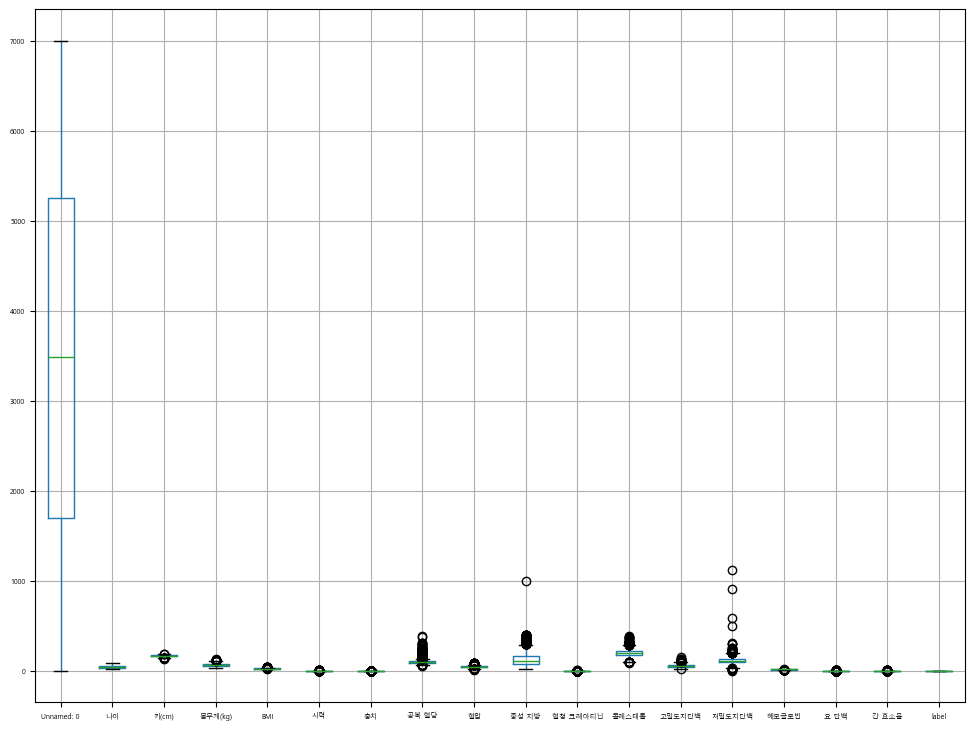

In [17]:
import matplotlib.pyplot as plt
plt.rc('font', family='Malgun Gothic') #맑은 고딕으로 설정
plt.rcParams['axes.unicode_minus'] = False #부호

plt.rcParams['figure.figsize'] = (12, 9)
plt.rcParams['font.size'] = 5

train_df.boxplot()
plt.show()

In [30]:
# 이상치라고 할 만한게 없다고 판단하여 이상치 처리는 생략.

In [18]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import make_pipeline
train_df = pd.read_csv('./data./train_filled_1.csv')
test_df = pd.read_csv('./data/test_practice.csv')

In [19]:
train_df.shape

(5000, 19)

In [20]:
test_df.shape

(2000, 18)

In [21]:
print(f"훈련 데이터 샘플 수: {train_df.shape[0]}")
print(f"테스트 데이터 샘플 수: {test_df.shape[0]}")

훈련 데이터 샘플 수: 5000
테스트 데이터 샘플 수: 2000


In [22]:
test_df.head()

,Unnamed: 0,ID,나이,키(cm),몸무게(kg),BMI,시력,충치,공복 혈당,혈압,중성 지방,혈청 크레아티닌,콜레스테롤,고밀도지단백,저밀도지단백,헤모글로빈,요 단백,간 효소율
0,1156,TRAIN_1156,55,155,55,22.89,0.85,0,142,26,89,0.7,201,49,134.0,13.0,1,1.05
1,5398,TRAIN_5398,45,160,55,21.48,1.10,0,99,47,38,0.7,215,83,124.0,13.9,1,1.50
2,4007,TRAIN_4007,50,165,60,22.04,0.90,0,119,34,145,0.5,176,72,75.0,14.6,1,1.43
3,3571,TRAIN_3571,40,160,55,21.48,1.00,0,87,39,84,0.7,172,53,NaN,12.6,1,2.57
4,6169,TRAIN_6169,30,175,95,31.02,1.50,0,90,44,197,1.1,233,49,154.0,16.4,1,0.67


In [23]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_log_error

def evaluate_reg_all(y_test, y_predict):
    MSE = mean_squared_error(y_test, y_predict, squared=True)
    RMSE = mean_squared_error(y_test, y_predict,squared=False)
    MAE = mean_absolute_error(y_test, y_predict)
    R2 = r2_score(y_test, y_predict)

    print(f'MSE: {MSE:.3f}, RMSE: {RMSE:.3F}, MAE: {MAE:.3F}, R^2: {R2:.3F}')

In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

x_data = train_df.drop(columns=['Unnamed: 0','ID','label'], axis=1)
y_data = train_df['label']

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.3, random_state=42)

model = DecisionTreeRegressor(random_state=42, max_depth=3)
model.fit(x_train, y_train)

print(f'훈련_R2: {model.score(x_train, y_train)}') 
print(f'테스트_R2: {model.score(x_test, y_test)}')

# x_test = test_df.drop(columns=['ID'], axis=1)
# x_real_df = pd.DataFrame(x_test)
# y_predict = model.predict(x_real_df)
# print(f'테스트_R2: {model.score(x_test, y_predict)}')
y_predict = model.predict(x_test)
evaluate_reg_all(y_test, y_predict)

훈련_R2: 0.23488065018472704
테스트_R2: 0.25843428985516437
MSE: 0.174, RMSE: 0.417, MAE: 0.348, R^2: 0.258
